In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
basinid = 256
pathin = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/MOASMO_exps_widerange_allsample'

file = f'{pathin}/level1_{basinid}_MOASMOcalib_shortparam/param_sets/intermediate_output_iter1.pkl.npz'
data = np.load(file, allow_pickle=True)
x_resample = data['x_resample']
y_resample = data['y_resample']
xlb_mean = data['xlb_mean']
xub_mean = data['xub_mean']
param_upper_bound_mean = data['param_upper_bound_mean']
param_lower_bound_mean = data['param_lower_bound_mean']
param0 = data['param0']
x = data['x']
y = data['y']

print(x.shape, y.shape)

numiter1 = x_resample.shape[0]

df_default = pd.read_pickle(f'{pathin}/level1_{basinid}_MOASMOcalib_shortparam/param_sets/all_default_parameters.pkl')

df_iter1_met = pd.read_csv(f'{pathin}/level1_{basinid}_MOASMOcalib_shortparam/ctsm_outputs/iter1_all_metric.csv')

(384, 12) (384, 2)


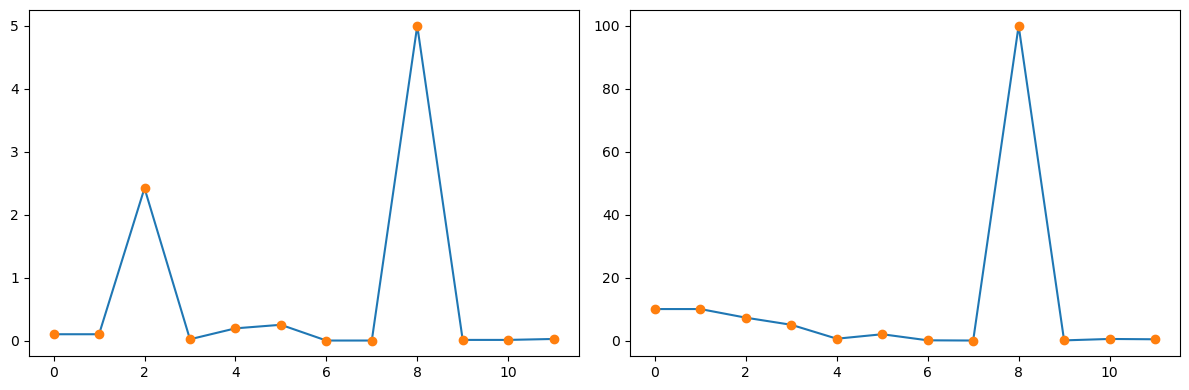

In [15]:
# compare bounds

fig = plt.figure(figsize=[12, 4])
fig.add_subplot(1,2,1)
plt.plot(xlb_mean)
plt.plot(param_lower_bound_mean, 'o')

fig.add_subplot(1,2,2)
plt.plot(xub_mean)
plt.plot(param_upper_bound_mean, 'o')

plt.tight_layout()
plt.show()

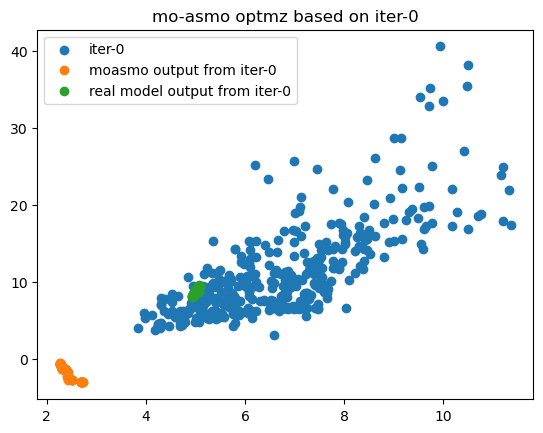

In [16]:
plt.scatter(y[:,0], y[:,1], label='iter-0')
plt.scatter(y_resample[:,0], y_resample[:,1], label='moasmo output from iter-0')
plt.scatter(df_iter1_met.values[:,0], df_iter1_met.values[:,1], label='real model output from iter-0')

plt.title('mo-asmo optmz based on iter-0')
plt.legend()
plt.show()

In [10]:
# check whether mo-asmo output parameters are outside boundary
nparam = x_resample.shape[1]
nset = x_resample.shape[0]
for i in range(nset):
    n = np.sum( (x_resample[i,:]<xlb_mean) & (x_resample[i,:]>xub_mean) )
    if np.any(n>0):
        print('find parameters outside bounds', n)

In [11]:
# are parameters correctly written to output (i.e., pickle files)
df_param = []
for i in range(numiter1):
    dfi = pd.read_pickle(f'{pathin}/level1_{basinid}_MOASMOcalib_shortparam/param_sets/paramset_iter1_trial{i}.pkl')
    df_param.append(dfi)

for i in range(numiter1):
    mp = np.array([np.mean(p) for p in df_param[i]['Value'].values])
    ratio = x_resample[i,:] / mp
    print(f'param set {i}:', ratio)


param set 0: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 1: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 2: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 3: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 4: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 5: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 6: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 7: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 8: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 9: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 10: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 11: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 12: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 13: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param set 14: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
param

In [24]:
# # two different generations (reproducibiltiy)
# for i in range(numiter1):
#     dfi1 = pd.read_pickle(f'{pathin}/level1_{basinid}_MOASMOcalib_shortparam/param_sets/paramset_iter1_trial{i}.pkl')
#     dfi2 = pd.read_pickle(f'{pathin}/level1_{basinid}_MOASMOcalib_shortparam-backup/param_sets/paramset_iter1_trial{i}.pkl')
#     diff = dfi1['Value'] - dfi2['Value']
#     diff = [np.mean(p) for p in diff]
#     print(np.max(np.abs(diff)))

In [26]:
# pd.read_pickle(f'{pathin}/level1_256_MOASMOcalib_shortparam/param_sets/paramset_iter1_trial{i}.pkl')